In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA as sklearn_pca
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [2]:
# Read and import data
raw_data = pd.read_csv('epi_r.csv')

In [3]:
# List the raw features in the dataset
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
# Get a basic understanding of the dataset

raw_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


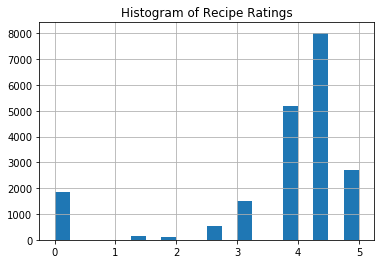

In [5]:
# Plot Ratings to see distribution

raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
#Create bins an group names

bins = [-0.1, 4.375, 5]
group_names = ['Low', 'High']

#Adding a column with both classes: High & Low
raw_data['categories'] = pd.cut(raw_data['rating'], bins, labels=group_names)

#Count the number of elements per class
pd.value_counts(raw_data['categories'])

raw_data['code'] = raw_data.categories.cat.codes
pd.value_counts(raw_data['code'])

0    17333
1     2719
Name: code, dtype: int64

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
#Initial features dropped 'categories','rating','code', 'title', 'calories', 'protein', 'fat', 'sodium','title'

#Dropped features added from the features importance = 0 (using a Random Fores Classifier for feature selection)

X = raw_data.drop(['categories','rating','code', 'title', 'calories', 'protein', 'fat', 'sodium','title',
'alaska',
 'bulgaria',
 'gouda',
 'crêpe',
 'miami',
 'seattle','waffle','hollywood','pot pie', 'kansas', 'anthony bourdain','portland',
 'eau de vie',
 'oktoberfest',
 'missouri',
 'columbus',
 'chile',
 'dip',
 'georgia',
 'guam', 'wisconsin', 'pennsylvania', 'apple juice', 'pacific palisades', 'france', 'oatmeal', 'emeril lagasse', 'octopus', 'cr��me de cacao', 'suzanne goin',
 'couscous',
 'tennessee',
 'north carolina',
 'westwood',
 'yuca',
 'denver',
 'healdsburg',
 "hors d'oeuvre",
 'st. louis',
 'hummus',
 'marshmallow',
 'sukkot',
 'rosé',
 'cookbooks',
 'costa mesa',
 'purim', 'camping', 'soufflé/meringue','custard','swordfish','labor day', 'rutabaga', 'philippines', 'bulgur', 'providence', 'slow cooker', 'bran',
 'ice cream',
 'pasadena',
 'london',
 'frittata',
 'atlanta',
 'colorado',
 'spain',
 '#wasteless',
 'wok',
 'flat bread',
 'mandoline',
 'beef shank',
 'nancy silverton',
 'mezcal',
 'kiwi',
 'low sugar',
 'aspen',
 'beverly hills',
 'mississippi',
 'west virginia',
 'minnesota',
 'butterscotch/caramel',
 'sorbet',
 'ireland',
 'omelet',
 'tested & improved',
 'lunar new year',
 'stock',
 'frankenrecipe',
 'hamburger',
 'dorie greenspan',
 'iced tea',
 'minneapolis',
'las vegas',
 'drinks',
 'paris',
 'venison',
 'new hampshire',
 'washington',
 'florida',
 'australia',
 'san francisco',
 'south carolina',
 'epi + ushg',
 'idaho',
 'vermont',
 'nebraska',
 'freezer food',
 'texas',
 'dallas',
'lentil',
 'chicago',
 'peru',
 'potato salad',
 'juicer',
 'brie',
 'bon app��tit',
 'boston',
 'washington, d.c.',
 'germany',
 'new mexico',
 'utah',
 'fritter',
 'whole wheat',
 'long beach',
 'grand marnier',
 'quiche',
 'kansas city',
'cranberry sauce',
 'new orleans',
 'caviar',
 'illinois',
'iced coffee',
 'israel',
 'maryland',
 'lasagna',
 'kentucky',
 'aperitif',
 'maine',
 'macaroni and cheese',
 '#cakeweek',
 'lingonberry',
'wild rice',
 'pizza',
 'iowa','cookbook critic', 'meatloaf', 'italy', 'wasabi', 'louisiana', 'cuba', 'windsor', 'rabbit', 'oklahoma', 'marinade',
 'chartreuse', 'lamb shank','rub', 'pancake', 'martini', 'mexico', 'lancaster', 'granola', 'semolina', 'epi loves the microwave',
 'cobbler/crumble', 'persimmon', 'england', 'jícama', 'haiti', 'halibut', 'meatball', 'orzo', 'cook like a diner', 'poppy',
 'egypt',
 'japan', 'arizona', 'jamaica', 'dominican republic', 'santa monica', 'leftovers', 'sake', 'kwanzaa', 'houston', 'buffalo'.
 'louisville',
 'house cocktail',
 'smoker',
 'yonkers',
 'cupcake',
 'kitchen olympics',
 'marscarpone'                 
], 1)

# Result column coded

Y = raw_data.code

In [9]:
# View the shape of the dataset

X.shape

(20052, 491)

#### PCA and new features based on PCA

In [10]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(X)

# Create a PCA object with the 30 components as a parameter
pca = decomposition.PCA(n_components=30)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

In [13]:
# Create a new dataframe with the new features

X1 = pd.DataFrame(X_std_pca)

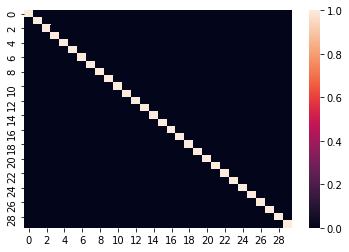

In [14]:
# Build heatmap based on the Correlation Matrix

sns.heatmap(X1.corr())
plt.show()

In [15]:
#Call the SV Classifier

svc1 = SVC(kernel='linear',cache_size=1000, probability=True, random_state=0)

# Train the SVClassifier based on the PCA features

svc1.fit(X1,Y)

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [16]:
#Cross valdate results 

kf = KFold(5)
print('Cross Validation Scores:', cross_val_score(svc1, X1, Y, cv=kf))
print('Cross Validation Scores:', cross_val_score(svc1, X1, Y, cv=kf).mean())

Cross Validation Scores: [ 0.86013463  0.86935926  0.86658354  0.86084788  0.86508728]
Cross Validation Scores: 0.864402519008


#### Select features based on a Random Forest Classifier

In [18]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [19]:
# Create a random forest classifier
clf = RandomForestClassifier(random_state=0)
# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature   
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 


importances = pd.DataFrame.from_dict(feats,orient='index').rename(columns={ 0: 'Importance'}).reset_index()
drop = importances.loc[importances['Importance'] == 0.0]
drop['index'].tolist()

['louisville',
 'house cocktail',
 'smoker',
 'yonkers',
 'cupcake',
 'kitchen olympics',
 'marscarpone']

In [20]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.007 
sfm = SelectFromModel(clf, threshold=0.007)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.007)

In [21]:
# Print the names of the most important features

for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

bake
bon appétit
chill
fall
gourmet
healthy
kid-friendly
milk/cream
onion
quick & easy
summer
tree nut free
vegetarian
wheat/gluten-free
winter


In [22]:
# Transform the data to create a new dataset containing only the most important features

X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [23]:
# New SVClassifier based on a new kernel

svc2 = SVC(cache_size=1000,  kernel='rbf', probability=True, random_state=0)

# Train the new classifier on the new dataset containing the most important features

svc2.fit(X_important_train, y_train)

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [25]:
#Cross validation of the results obtained
kf = KFold(5)
print('Cross Validation Scores:', cross_val_score(svc2, X_important_test, y_test, cv=kf))
print('Cross Validation Scores:', cross_val_score(svc2, X_important_test, y_test, cv=kf).mean())

Cross Validation Scores: [ 0.8538206   0.86533666  0.86783042  0.85120532  0.87032419]
Cross Validation Scores: 0.861703437972
